In [1]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy.ma as ma

import matplotlib.ticker as ticker

from mpl_toolkits.axes_grid1 import make_axes_locatable #for subplot colorbars
from matplotlib.pyplot import cm


# configure plotting
%config InlineBackend.rc = {'figure.dpi': 300, 'savefig.dpi': 300, \
                            'figure.figsize': (6, 6 / 1.6), 'font.size': 8, \
                            'figure.facecolor': (1, 1, 1, 0),'font.sans-serif':'Latin Modern Math'}

from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)


%matplotlib inline

In [2]:
# dark style sheet plotting

plt.style.use('dark_background')

# Spatial maps

In [3]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

cmap = 'inferno_r'

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

In [4]:
def spatial_maps(a,mask):
    
    a[a <= 0] = 1e-32
    l = 3.3 * 100000
    c = ((8*np.pi)*(np.sqrt(2/5))*l)/633
    
    mask = mask
    masked_map = ma.masked_array(a, mask=mask)
    masked_map = -(np.log(masked_map)/c) 
    
    return masked_map

In [7]:
G_efold = 1/np.exp(1)
G_efold

0.36787944117144233

In [8]:
    G_efold = 1/np.exp(1)
    l = 3.3 * 100000
    c = ((8*np.pi)*(np.sqrt(2/5))*l)/633
    strain_efold = -(np.log(G_efold)/c) 

In [9]:
strain_efold

0.00012067572447780414

# Loading data

In [59]:
os.chdir(
    '/media/nakul/Seagate Portable Drive/Data/DWS_Creep/DWS_Correlation_Outputs/Materials/Kaolinite/02_16_2022/02_16_2022_B'
)

data = np.load('Kaolinite_02_16_2022_B_Gmaps.npz')
correlation_maps_cumulative = data['data1']
correlation_maps_instantaneous = data['data2']
mask = data['data3']

/tmp/ipykernel_54321/1952778555.py:3: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0] = 1e-32


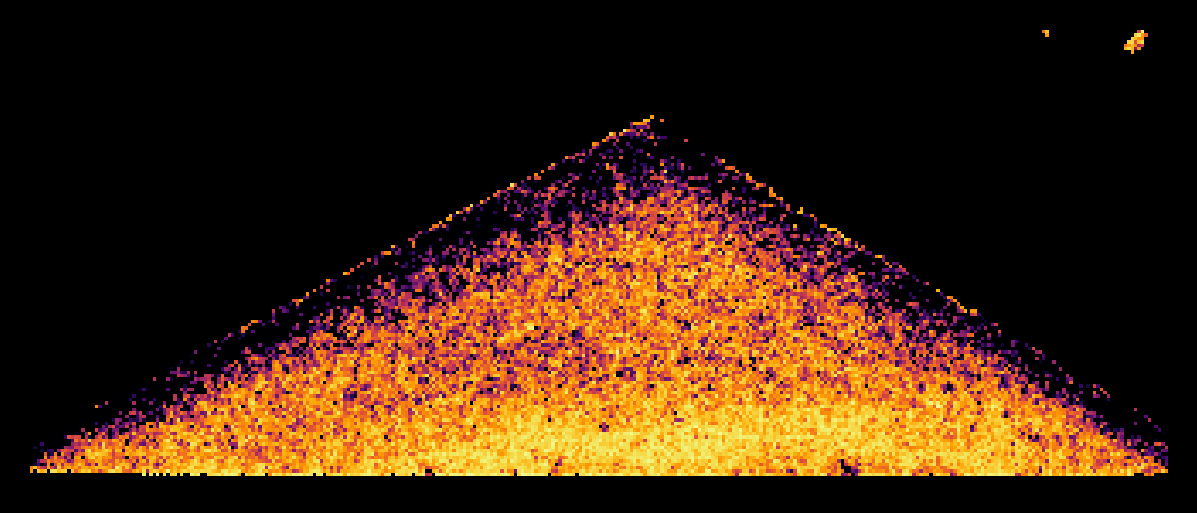

In [53]:
strain_map = spatial_maps(correlation_maps_cumulative[1][99], mask)

cmap = 'inferno_r'
vmin = 1e-7
vmax = 5e-5

fig = plt.figure(figsize=(6, 2))
ax = plt.subplot(111)

im = ax.imshow(strain_map, vmin=vmin, vmax=vmax, cmap=cmap)
ax.axis('off')
ax.set_xticks([])
ax.set_yticks([])

# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(im,
#              cax=cax,
#              orientation='vertical',
#              format=ticker.FuncFormatter(fmt))
# # cax.tick_params(labelsize=15)
# cax.set_title(r'$\dot{\epsilon}[s^{-1}]$', fontsize=14)

# ax.set_xscale('log')
# ax.set_yscale('log')
?

# Movies

In [60]:
fig = plt.figure(figsize=(6, 2))

from mpl_toolkits.axes_grid1 import make_axes_locatable
l = 3.3 * 100000
c = ((8 * np.pi) * (np.sqrt(2 / 5)) * l) / 633
n = 0
time = np.arange(0, 1000, 1)

for i in range(99):

    ########################################################################################
    fig = plt.figure(figsize=(6, 2))
    ax1 = plt.subplot(111)
    ########################################################################################
    frame = correlation_maps_instantaneous[i][1]
    masked_map = ma.masked_array(frame, mask=mask)
    masked_map[masked_map <= 0] == 1e-32
    masked_map = -(np.log(masked_map) / c)
    im1 = ax1.imshow(masked_map, vmin=1e-7, vmax=1e-5, cmap='inferno_r')
    cmap = plt.cm.gray
    cmap.set_bad('white', 1.)
    ########################################################################################
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im1,
                 cax=cax,
                 orientation='vertical',
                 format=ticker.FuncFormatter(fmt))
    # cax.tick_params(labelsize=15)
    cax.set_title(r'$\dot{\epsilon}[s^{-1}]$', fontsize=14)
    ax1.axis('off')
    ########################################################################################
    fig.tight_layout()

    plt.savefig(
        "/home/nakul/Documents/NaturalPhilosophy/Presentations/PhD_Defense/Videos/kaolinite/img_"
        + str(n) + ".png",
        format="PNG")
    plt.clf()
    n += 1

/tmp/ipykernel_54321/1222874055.py:17: RuntimeWarning: invalid value encountered in less_equal
  masked_map[masked_map <= 0] == 1e-32
/tmp/ipykernel_54321/1222874055.py:18: RuntimeWarning: divide by zero encountered in log
  masked_map = -(np.log(masked_map) / c)
/tmp/ipykernel_54321/1222874055.py:18: RuntimeWarning: invalid value encountered in log
  masked_map = -(np.log(masked_map) / c)
/tmp/ipykernel_54321/1222874055.py:21: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("gray").copy()
  cmap.set_bad('white', 1.)
/tmp/ipykernel_54321/1222874055.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much me

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>